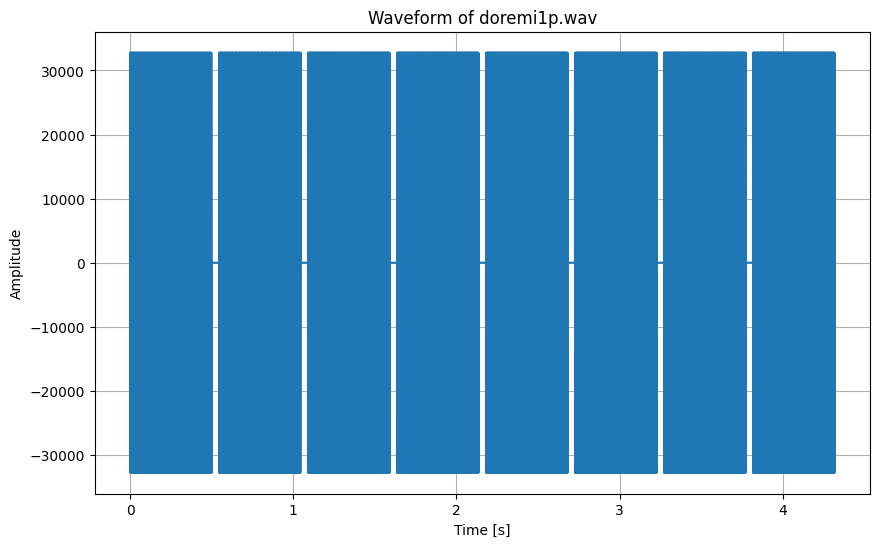

Peak frequency: 586.6628503004075 Hz


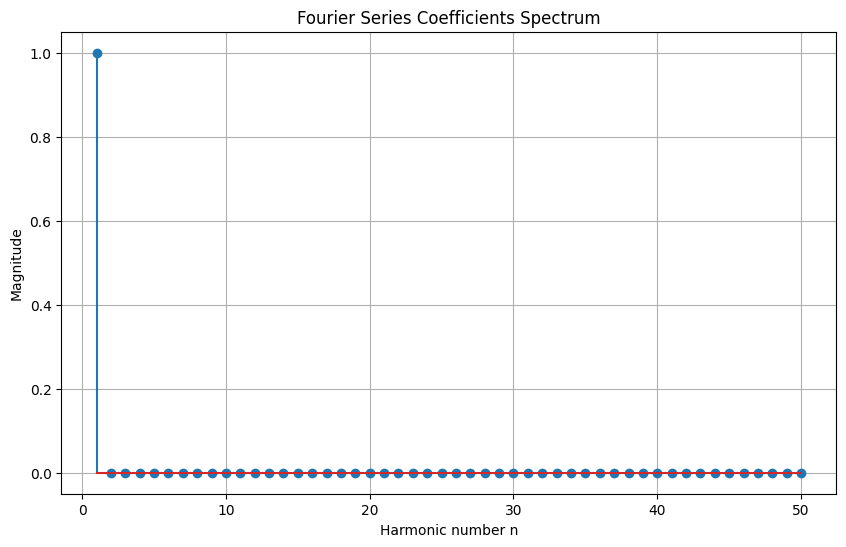

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.integrate import quad

# WAVファイルの読み込み
samplerate, data = wav.read('doremi1p.wav')

# モノラルに変換（もし必要であれば）
if len(data.shape) > 1:
    data = data.mean(axis=1)

# 波形のプロット
time = np.arange(len(data)) / samplerate
plt.figure(figsize=(10, 6))
plt.plot(time, data)
plt.title('Waveform of doremi1p.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# フーリエ変換
frequencies = np.fft.fftfreq(len(data), 1/samplerate)
fft_values = np.fft.fft(data)

# 正の周波数の部分を抽出
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft_values = np.abs(fft_values[:len(fft_values)//2])

# 最大のピーク周波数を求める
peak_frequency = positive_freqs[np.argmax(positive_fft_values)]
print(f"Peak frequency: {peak_frequency} Hz")

# フーリエ級数展開のための関数定義
def x(t, omega):
    return np.sin(omega * t)  # ここでは簡単なサイン波を例として使用

# 最大項数
n_max = 50

# 基本周波数と周期
f = peak_frequency  # ピーク周波数を使用
omega = 2 * np.pi * f
T = 1 / f  # 周期

# a0, an, bn の計算
def a0(T, omega, signal_func):
    return (1 / T) * quad(lambda t: signal_func(t, omega), 0, T)[0]

def an(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.cos(n * omega * t), 0, T)[0]

def bn(n, T, omega, signal_func):
    return (2 / T) * quad(lambda t: signal_func(t, omega) * np.sin(n * omega * t), 0, T)[0]

a0_x = a0(T, omega, x)
a_x_vals = [an(n, T, omega, x) for n in range(1, n_max + 1)]
b_x_vals = [bn(n, T, omega, x) for n in range(1, n_max + 1)]

# スペクトルのプロット
X_vals = [np.sqrt(a**2 + b**2) for a, b in zip(a_x_vals, b_x_vals)]

plt.figure(figsize=(10, 6))
plt.stem(range(1, n_max + 1), X_vals)
plt.title('Fourier Series Coefficients Spectrum')
plt.xlabel('Harmonic number n')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()
